## Getting the data

http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

Copy the table from this link and paste it into a csv file named `dataset_uncleaned.csv`. Then follow the next steps for preprocessing.

## Cleaning our data

In [2]:
import pandas as pd

In [2]:
import csv
from collections import defaultdict

disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_')
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group)
        ctr = ctr + 1

    return disease_list

with open("Scraped-Data/dataset_uncleaned.csv") as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)
    for row in reader:

        if row[0]!="\xc2\xa0" and row[0]!="":
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="\xc2\xa0" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s)
                dict_wt[d] = weight

    #print (dict_)

Writing our cleaned data

In [3]:
with open("Scraped-Data/dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            #key = str.encode(key)
            key = str.encode(key).decode('utf-8')
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [4]:
columns = ['Source','Target','Weight']

In [5]:
data = pd.read_csv("Scraped-Data/dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [6]:
data.head()

,Source,Target,Weight
0,cellulitis,erythema,341
1,cellulitis,pain,341
2,cellulitis,swelling,341
3,cellulitis,redness,341
4,cellulitis,fever,341


In [8]:
data.to_csv("Scraped-Data/dataset_clean.csv",index=False)

In [15]:
slist = []
dlist = []
with open("Scraped-Data/nodetable.csv","w") as csvfile:
    writer = csv.writer(csvfile)

    for key,values in dict_.items():
        for v in values:
            if v not in slist:
                writer.writerow([v,v,"symptom"])
                slist.append(v)
        if key not in dlist:
            writer.writerow([key,key,"disease"])
            dlist.append(key)

In [16]:
nt_columns = ['Id','Label','Attribute']

In [17]:
nt_data = pd.read_csv("Scraped-Data/nodetable.csv",names=nt_columns, encoding ="ISO-8859-1",)

In [18]:
nt_data.head()

,Id,Label,Attribute
0,erythema,erythema,symptom
1,pain,pain,symptom
2,swelling,swelling,symptom
3,redness,redness,symptom
4,fever,fever,symptom


In [19]:
nt_data.to_csv("Scraped-Data/nodetable.csv",index=False)

## Analysing our cleaned data

In [20]:
data = pd.read_csv("Scraped-Data/dataset_clean.csv", encoding ="ISO-8859-1")

In [21]:
data.head()

,Source,Target,Weight
0,cellulitis,erythema,341
1,cellulitis,pain,341
2,cellulitis,swelling,341
3,cellulitis,redness,341
4,cellulitis,fever,341


In [22]:
len(data['Source'].unique())

149

In [23]:
len(data['Target'].unique())

405

In [24]:
df = pd.DataFrame(data)

In [25]:
df_1 = pd.get_dummies(df.Target)

In [26]:
df_1.head()

,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.head()

,Source,Target,Weight
0,cellulitis,erythema,341
1,cellulitis,pain,341
2,cellulitis,swelling,341
3,cellulitis,redness,341
4,cellulitis,fever,341


In [28]:
df_s = df['Source']

In [29]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [30]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [31]:
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,cellulitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,cellulitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cellulitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,cellulitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,cellulitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
len(df_pivoted)

2116

In [33]:
cols = df_pivoted.columns

In [34]:
cols = cols[1:]

In [35]:
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pneumocystis carinii pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accident cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquired immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
len(df_pivoted)

149

In [38]:
df_pivoted.to_csv("Scraped-Data/df_pivoted.csv")

In [39]:
x = df_pivoted[cols]
y = df_pivoted['Source']

### Trying out our classifier to learn diseases from the symptoms

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [42]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [43]:
mnb.score(x_test, y_test)

0.0

### Inferences on train and test split
It can't work on unseen data because it has never seen that disease before. Also, there is only one point for each disease and hence no point for this. So we need to train the model entirely. Then what will we test it on? Missing data? Say given one symptom what is the disease? This is again multilabel classification. We can work symptom on symptom. What exactly is differential diagnosis, we need to replicate that.

In [44]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [45]:
mnb_tot.score(x, y)

0.89932885906040272

In [46]:
disease_pred = mnb_tot.predict(x)

In [47]:
disease_real = y.values

In [48]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} Actual:{1}'.format(disease_pred[i], disease_real[i]))

Pred: HIV Actual:acquired immuno-deficiency syndrome
Pred: biliary calculus Actual:cholelithiasis
Pred: coronary arteriosclerosis Actual:coronary heart disease
Pred: depression mental Actual:depressive disorder
Pred: HIV Actual:hiv infections
Pred: carcinoma breast Actual:malignant neoplasm of breast
Pred: carcinoma of lung Actual:malignant neoplasm of lung
Pred: carcinoma prostate Actual:malignant neoplasm of prostate
Pred: carcinoma colon Actual:malignant tumor of colon
Pred: candidiasis Actual:oralcandidiasis
Pred: effusion pericardial Actual:pericardial effusion body substance
Pred: malignant neoplasms Actual:primary malignant neoplasm
Pred: sepsis (invertebrate) Actual:septicemia
Pred: sepsis (invertebrate) Actual:systemic infection
Pred: tonic-clonic epilepsy Actual:tonic-clonic seizures


These are the predicted versus actual diseases that our classifier misclassifies.

### Training a decision tree

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [50]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
Acurracy:  0.89932885906


In [51]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='DOT-files/tree.dot', 
                feature_names=cols)

In [52]:
from IPython.display import Image
Image(filename='tree.png')

According to the plotted decision tree, `Jugular venous distention` is the attribute symptom that has the highest gini score of 0.9846. Thus this symptom would play a major role in predicting diseases.
<hr>

## Analysis of the Manual data

In [5]:
data = pd.read_csv("Manual-Data/Training.csv")

In [6]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [7]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [8]:
len(data.columns)

133

In [9]:
len(data['prognosis'].unique())

41

41 different type of target diseases are available in the manual training dataset.

In [10]:
df = pd.DataFrame(data)

In [11]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [12]:
len(df)

4920

The manual data contains approximately 4920 rows.

In [13]:
cols = df.columns

In [14]:
cols = cols[:-1]

In [15]:
cols

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [16]:
len(cols)

132

We have 132 symptoms in the manual data.

In [17]:
x = df[cols]
y = df['prognosis']

### Trying out our classifier to learn diseases from the symptoms

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [21]:
mnb.score(x_test, y_test)

1.0

In [23]:
from sklearn import cross_validation
print ("cross result========")
scores = cross_validation.cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[ 1.  1.  1.]
1.0


We use the testing dataset to actually test our Multinomial Bayes model

In [24]:
test_data = pd.read_csv("Manual-Data/Testing.csv")

In [31]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [32]:
testx = test_data[cols]
testy = test_data['prognosis']

In [33]:
mnb.score(testx, testy)

1.0

### Training a decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  1.0


In [40]:
from sklearn import cross_validation
print ("cross result========")
scores = cross_validation.cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[ 0.98021583  0.97781885  0.96774194]
0.975258872265


In [41]:
print ("Acurracy on the actual test data: ", clf_dt.score(testx,testy))

Acurracy on the actual test data:  1.0


In [42]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='DOT-files/tree.dot', 
                feature_names=cols)

Running the following command we can get the decision tree image.

```dot -Tpng tree.dot -o tree.png```

In [49]:
from IPython.display import Image
Image(filename='tree.png')

In [43]:
dt.__getstate__()

{'_sklearn_version': '0.18.1',
 'class_weight': None,
 'classes_': array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
        'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
        'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
        'Common Cold', 'Dengue', 'Diabetes ',
        'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection',
        'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B',
        'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ',
        'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo',
        'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis',
        'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia',
        'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection',
        'Varicose veins', 'hepatitis A'], dtype=object),
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_features_': 132,
 'max_leaf_nodes': None,
 'min_i

#### Finding the Feature importances

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

Feature ranking:


In [46]:
features = cols

In [47]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 52 - redness_of_eyes (0.026703)
2. feature 93 - internal_itching (0.026649)
3. feature 79 - hip_joint_pain (0.026626)
4. feature 105 - polyuria (0.026390)
5. feature 126 - silver_like_dusting (0.025712)


Thus the top features are the symptoms of redness of eyes, internal itching etc that would play a bigger role in predicting diseases. This can be verified by the exported decision tree.

In [52]:
export_graphviz(dt, 
                out_file='DOT-files/tree-top5.dot', 
                feature_names=cols,
                max_depth = 5
               )

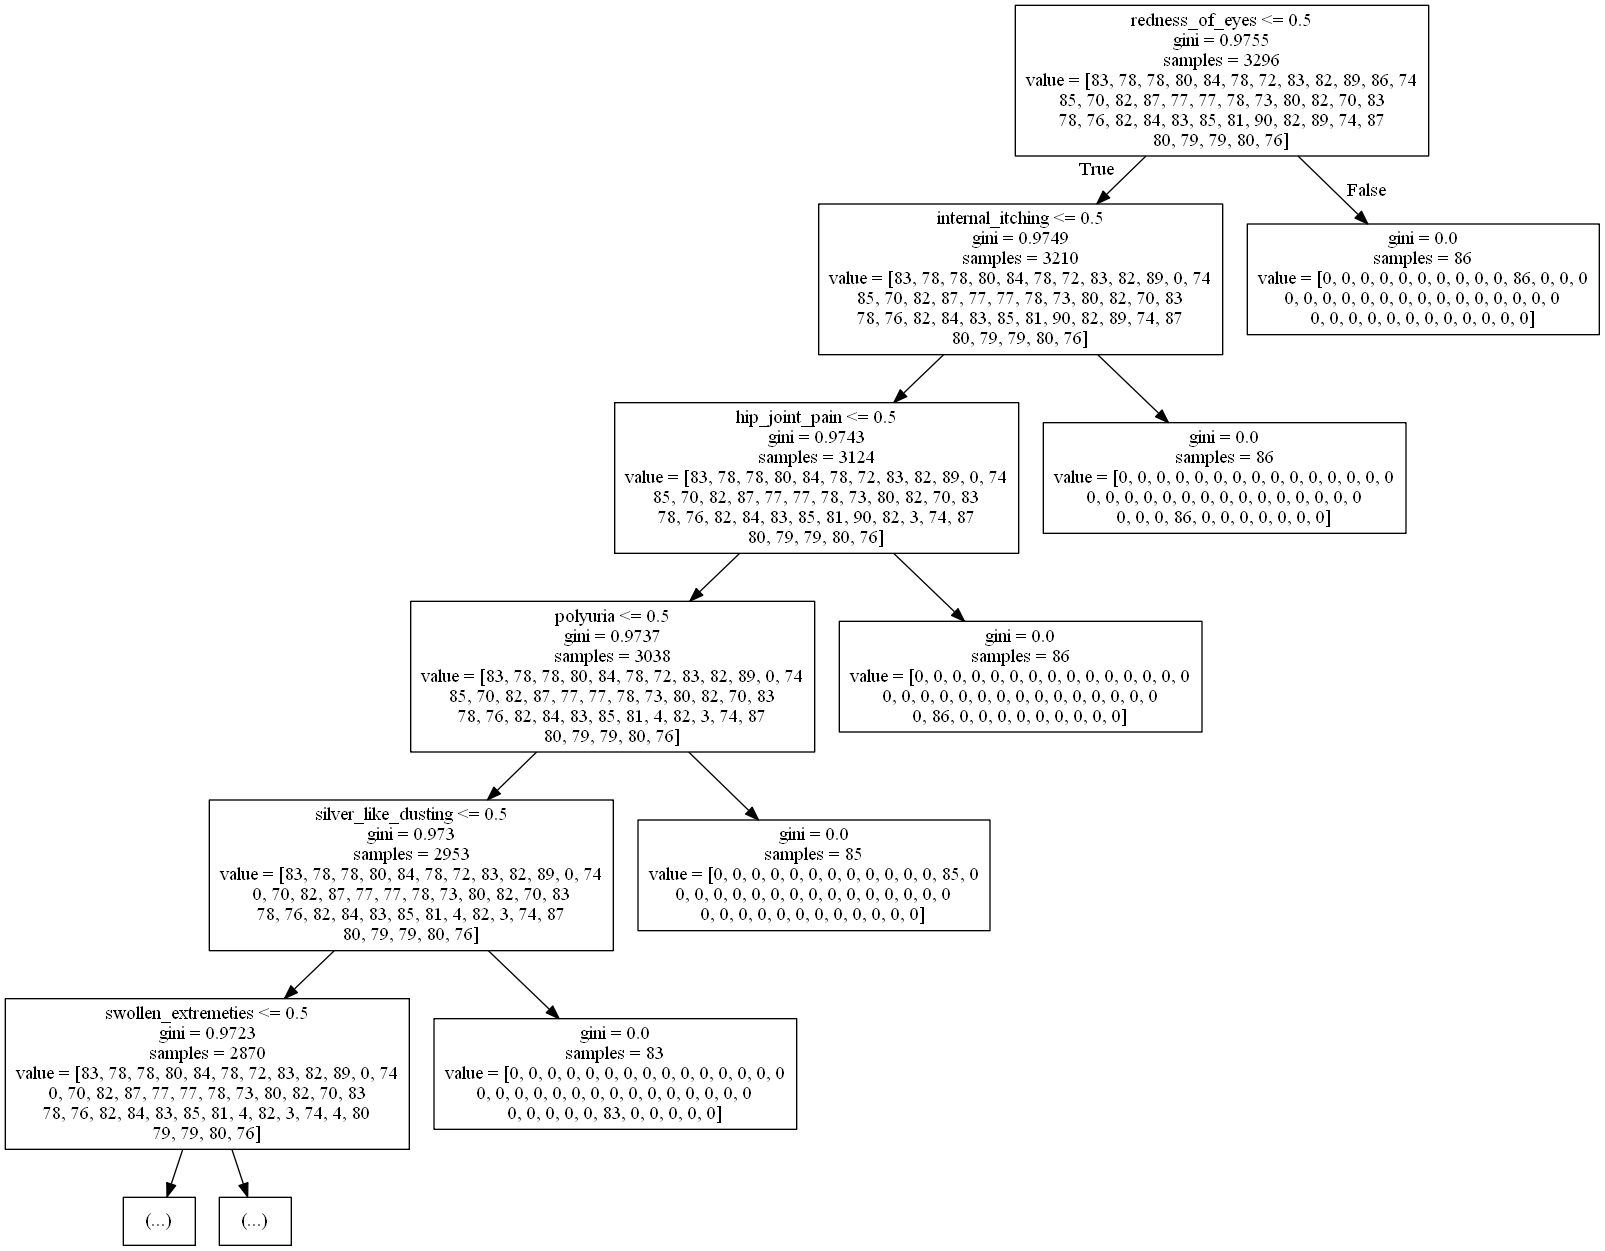

In [54]:
from IPython.display import Image
Image(filename='tree-top5.png')

The redness_of_eyes is the top symptom that has the highest [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) score of 0.9755. Then comes internal_itchiness with a score of 0.9749 and so on. Basically this implies that the redness_of_eyes symptom has the potential to divide most samples into particular classes and hence is selected as the root of the decision tree. From there we move down with decreasing order of Gini scores.

In [61]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [64]:
feature_dict['redness_of_eyes']

52

In [102]:
sample_x = [i/52 if i ==52 else i*0 for i in range(len(features))]

This means predicting the disease where the only symptom is redness_of_eyes.

In [103]:
len(sample_x)

132

In [104]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [105]:
dt.predict(sample_x)

array(['Common Cold'], dtype=object)

In [106]:
dt.predict_proba(sample_x)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]])

Hence it has 100% confidence that the disease would be Common Cold. The prediction would improve once we take more symptoms as input.

<hr>